In [55]:
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [56]:
transactions_im = pd.read_csv('transactions_cluster1.csv', header=0)

In [57]:
transactions = transactions_im.fillna(0)

In [58]:
transactions['date'] = pd.to_datetime(transactions['date'], format = '%Y-%m-%d')
transactions = transactions.set_index('date')

In [59]:
ts = transactions.mean(axis=1)
ts.head()

date
2013-01-01    1166.083333
2013-01-02    1166.083333
2013-01-03    1018.458333
2013-01-04     974.208333
2013-01-05    1132.916667
dtype: float64

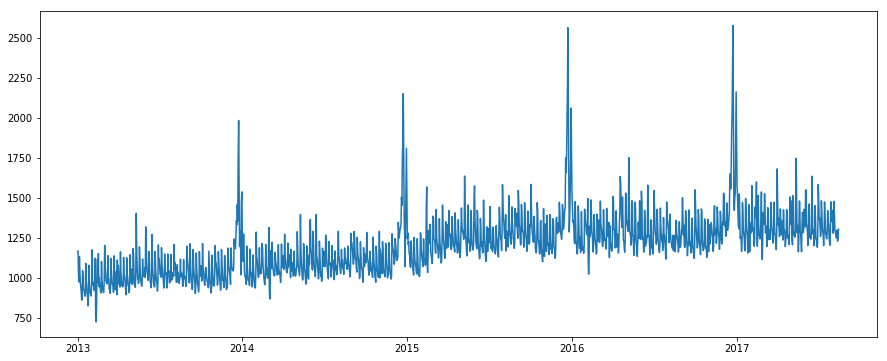

In [60]:
plt.plot(ts.index.to_pydatetime(), ts.values)

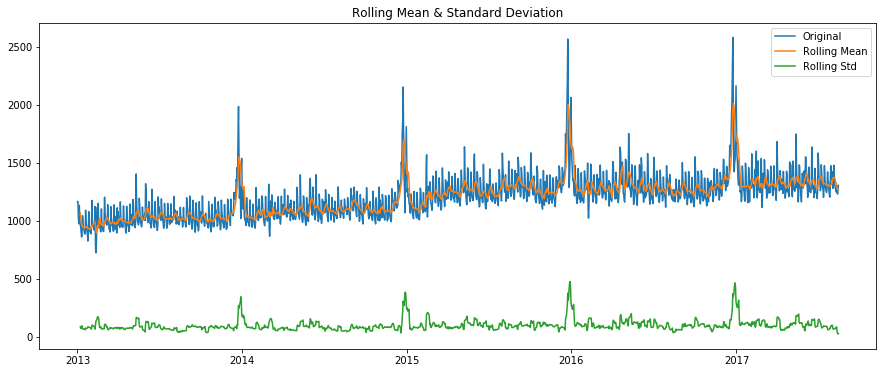

In [61]:
rolmean = ts.rolling(window=7).mean()
rolstd = ts.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [62]:
test = adfuller(ts, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-3.69559042566
P Value: 		0.00417560801045
Lags Used: 		25
Observations: 		1662
Critical Value 1%: 	-3.43429069112
Critical Value 5%: 	-2.86328059087
Critical Value 10%: 	-2.5676966487
Information Criterion: 	19081.279145


In [63]:
ts_log = np.log(ts)

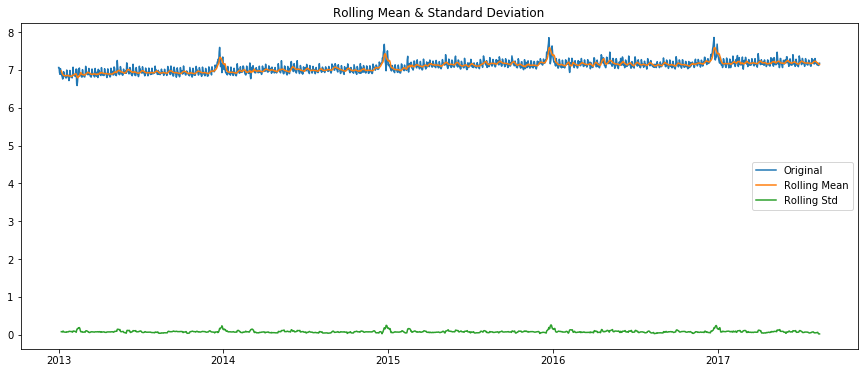

In [64]:
rolmean = ts_log.rolling(window=7).mean()
rolstd = ts_log.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts_log, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [65]:
test = adfuller(ts_log, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-3.37939930245
P Value: 		0.0116815185228
Lags Used: 		25
Observations: 		1662
Critical Value 1%: 	-3.43429069112
Critical Value 5%: 	-2.86328059087
Critical Value 10%: 	-2.5676966487
Information Criterion: 	-4877.94067436


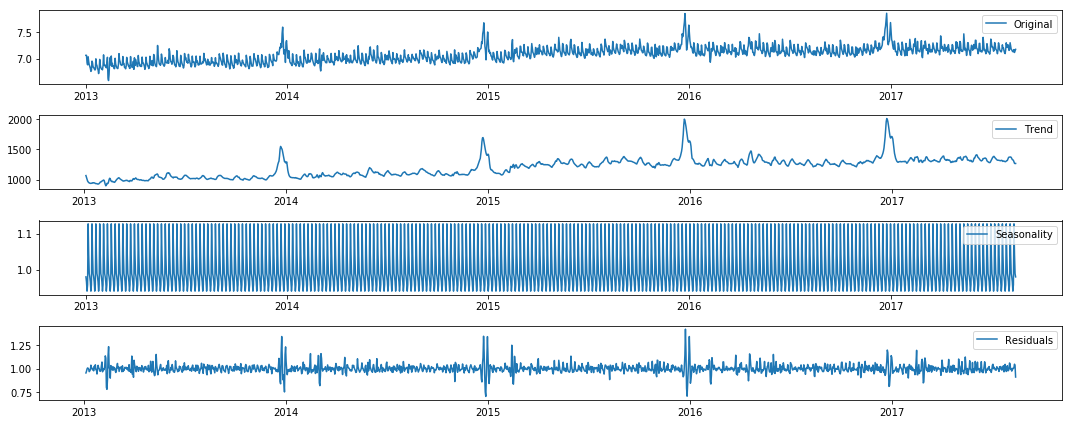

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

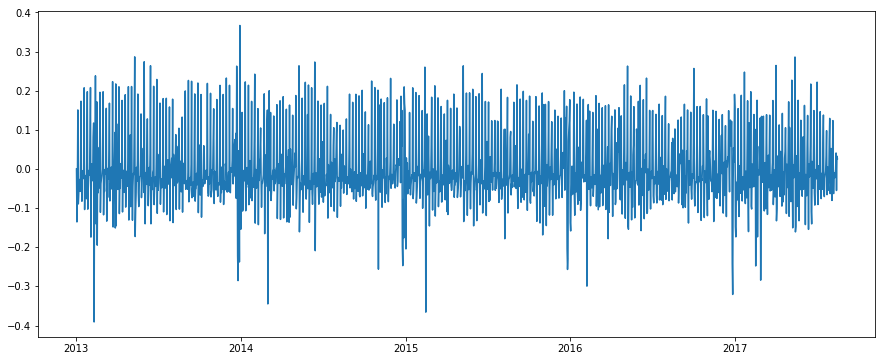

In [67]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff.index.to_pydatetime(), ts_log_diff.values)

In [68]:
ts_log_diff.dropna(inplace=True)

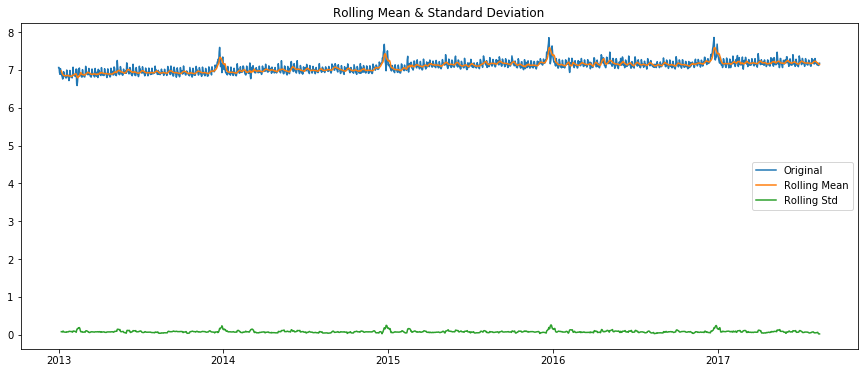

In [69]:
rolmean = ts_log.rolling(window=7).mean()
rolstd = ts_log.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts_log, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [70]:
test = adfuller(ts, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-3.69559042566
P Value: 		0.00417560801045
Lags Used: 		25
Observations: 		1662
Critical Value 1%: 	-3.43429069112
Critical Value 5%: 	-2.86328059087
Critical Value 10%: 	-2.5676966487
Information Criterion: 	19081.279145


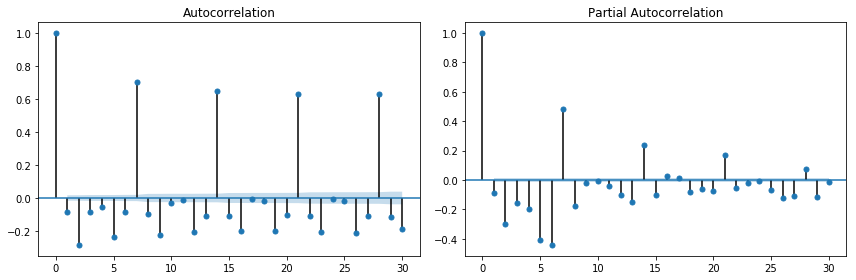

In [71]:
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

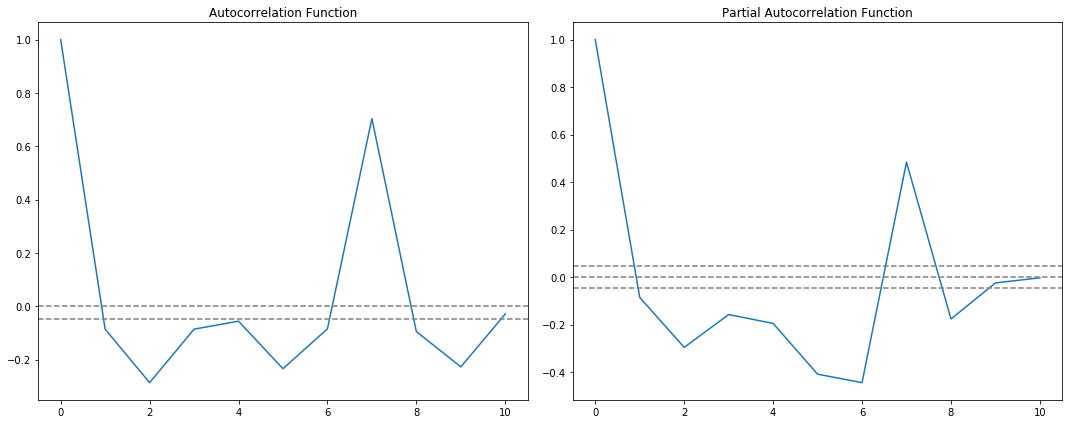

In [72]:
#ACF and PACF plots

lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [73]:
train_size = int(len(ts_log_diff) * 0.9)
test_size = len(ts_log_diff) - train_size
train, test = ts_log_diff[ts_log_diff.index[0].to_pydatetime():ts_log_diff.index[train_size].to_pydatetime()], ts_log_diff[ts_log_diff.index[train_size].to_pydatetime():ts_log_diff.index[len(ts_log_diff)-1].to_pydatetime()]
print(len(train), len(test))

1519 169


In [74]:
model = ARIMA(ts_log_diff[:1181], order=(2, 1, 1))  
results_ARIMA = model.fit(disp=-1) 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [75]:
predictions=results_ARIMA.predict(start=ts_log_diff.index[1150],end=ts_log_diff.index[1686])

Text(0.5,1,'RSS: nan')

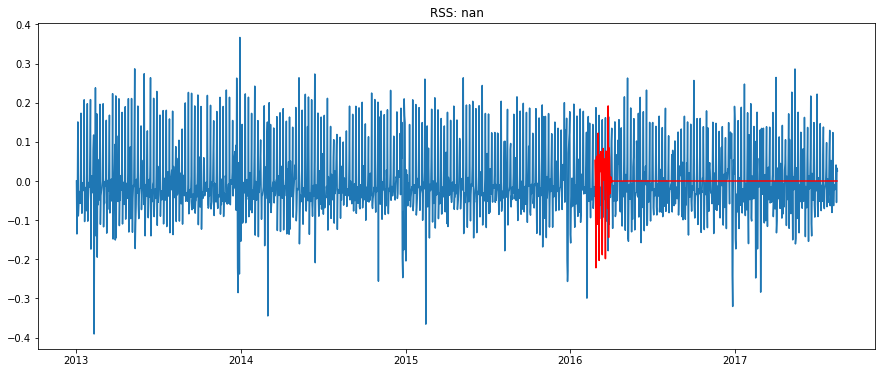

In [76]:
plt.plot(ts_log_diff.index.to_pydatetime(), ts_log_diff.values)
plt.plot(ts_log_diff.index[1149:1686].to_pydatetime(), predictions, color='red')
plt.title('RSS: %.4f'% sum((predictions-ts_log_diff)**2))

In [77]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1180
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1165.889
Method:                       css-mle   S.D. of innovations              0.090
Date:                Thu, 14 Dec 2017   AIC                          -2321.778
Time:                        19:23:50   BIC                          -2296.411
Sample:                    01-03-2013   HQIC                         -2312.215
                         - 03-27-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.168e-06   5.61e-06     -0.208      0.835   -1.22e-05    9.83e-06
ar.L1.D.y     -0.1672      0.028     -5.942      0.000      -0.222      -0.112
ar.L2.D.y     -0.2680      0.028     -9.512      0.0

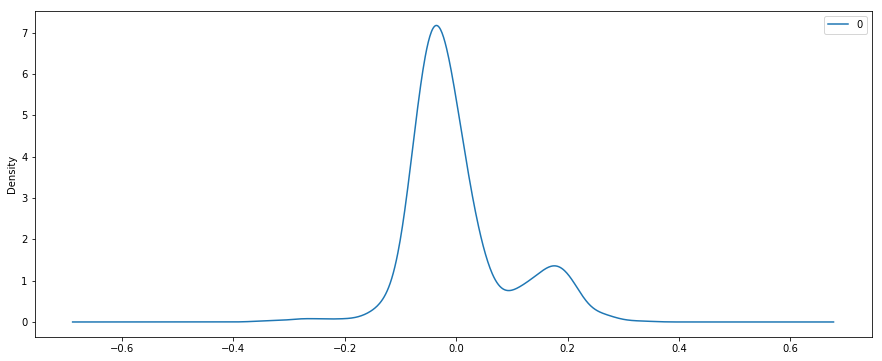

In [78]:
# plot residual errors
residuals = DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')

In [79]:
print(residuals.describe())

                 0
count  1180.000000
mean      0.001457
std       0.090145
min      -0.347103
25%      -0.052666
50%      -0.021684
75%       0.025232
max       0.335897


In [80]:
predictions_ARIMA_diff = pd.Series(predictions, copy=True)
print(predictions_ARIMA_diff.head())

2016-02-26    0.052677
2016-02-27   -0.000715
2016-02-28   -0.221759
2016-02-29    0.059792
2016-03-01    0.063128
Freq: D, dtype: float64


In [81]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index[1150:1686])

In [82]:
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

In [83]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

Text(0.5,1,'RMSE: nan')

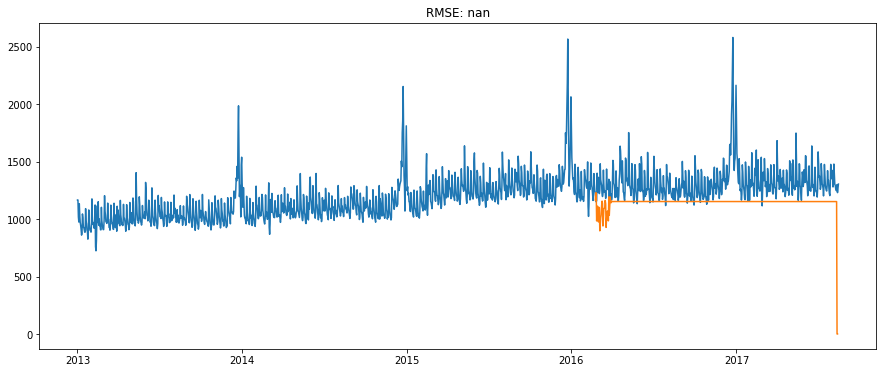

In [84]:
plt.plot(ts.index.to_pydatetime(), ts.values)
plt.plot(ts.index[1148:1686].to_pydatetime(), predictions_ARIMA.values)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts[1148:1686])**2)/test_size))

In [85]:
expected=list(ts)

In [86]:
bias=[expected[i+1148]-predictions_ARIMA[i] for i in range(len(predictions_ARIMA))]

In [87]:
mean_forcast_error=sum(bias)/len(bias)
print('Mean forcast error: %f' % mean_forcast_error)

Mean forcast error: 177.308199


In [88]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(expected[1148:1686], predictions_ARIMA)
print('MAE: %f' % mae)

MAE: 178.513885


In [89]:
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__
results_ARIMA.save('ARIMA-cluster1.pkl')